In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pi= np.pi
k0 = 12566370 #for light of wavelength 500nm

In [2]:
#for this case we are considering normal incidence so thI = 0 which will simplify some of the equations. 
#it should still work with thI equal to different values and still return a sinusoidal graph. 
#presuming were still only interested in the real part then take the exponential to be equal to cos from euler's formula


In [3]:
def rp(thI, n1, n2):
    thT = np.arcsin( (n1*np.sin(thI)) /n2)
    
    return (n2 * np.cos(thI) - n1 * np.cos(thT)) / (n2 * np.cos(thI) + n1 * np.cos(thT))
    

def rs(thI, n1, n2):
    thT = np.arcsin( (n1*np.sin(thI)) /n2)
    
    return (n1*np.cos(thI) - n2*np.cos(thT)) /  (n1*np.cos(thI) + n2*np.cos(thT))

In [4]:
def rp_slab(thI, d):
    return (rp(thI, 1,3) + rp(thI, 3,1.5)*np.cos(2*3*d*k0*np.cos(thI))) / 
            (1 + rp(thI, 1,3)*rp(thI,3,1.5)*np.cos(2*3*d*k0*np.cos(thI)))

def rs_slab(thI, d):
    return (rs(thI, 1,3) + rs(thI, 3,1.5)*np.cos(2*3*d*k0*np.cos(thI))) /
            (1 + rs(thI, 1,3)*rs(thI,3,1.5)*np.cos(2*3*d*k0*np.cos(thI)))

In [5]:
rp_slab(0, (500*10**(-9))/4*3)   #wvl/4n  n=3

0.7142857142855388

In [6]:
def Rs(thI, d):
    return np.abs(rs_slab(thI,d)**2)

def Rp(thI, d):
    return np.abs(rp_slab(thI,d)**2)

In [7]:
Rp(0, (500*10**(-9))/4*3)

0.5102040816324024

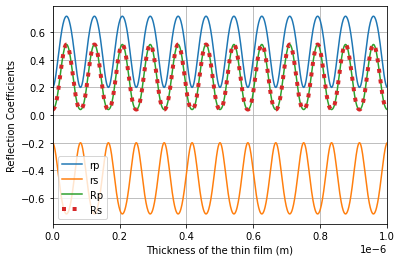

In [35]:
x = np.linspace(0,0.000001,1000) #varying thickness from 0-1000nm

plt.plot(x, rp_slab(0,x))
plt.plot(x, rs_slab(0,x))

plt.plot(x, Rp(0,x))
plt.plot(x, Rs(0,x), linestyle=':', linewidth=4)

plt.xlim(0,0.000001)
#plt.ylim(0,0.1)
plt.title('')

plt.ylabel('Reflection Coefficients')
plt.xlabel('Thickness of the thin film (m)')

#labels=['0','200','400','600','800','1000']
#plt.xticks(np.arange(0,10,2))

plt.grid()
plt.legend(['rp','rs','Rp','Rs'])


plt.savefig('varying_thickness')
plt.show()